In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\iphone.csv')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   productAsin        3062 non-null   object        
 1   country            3062 non-null   object        
 2   date               3062 non-null   datetime64[ns]
 3   isVerified         3062 non-null   bool          
 4   ratingScore        3062 non-null   int64         
 5   reviewTitle        3062 non-null   object        
 6   reviewDescription  2976 non-null   object        
 7   reviewUrl          3046 non-null   object        
 8   reviewedIn         3062 non-null   object        
 9   variant            3062 non-null   object        
 10  variantAsin        3062 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(8)
memory usage: 242.3+ KB


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.nunique()

productAsin             7
country                 4
date                  784
isVerified              2
ratingScore             5
reviewTitle          1955
reviewDescription    2281
reviewUrl            2396
reviewedIn           1229
variant                86
variantAsin            99
dtype: int64

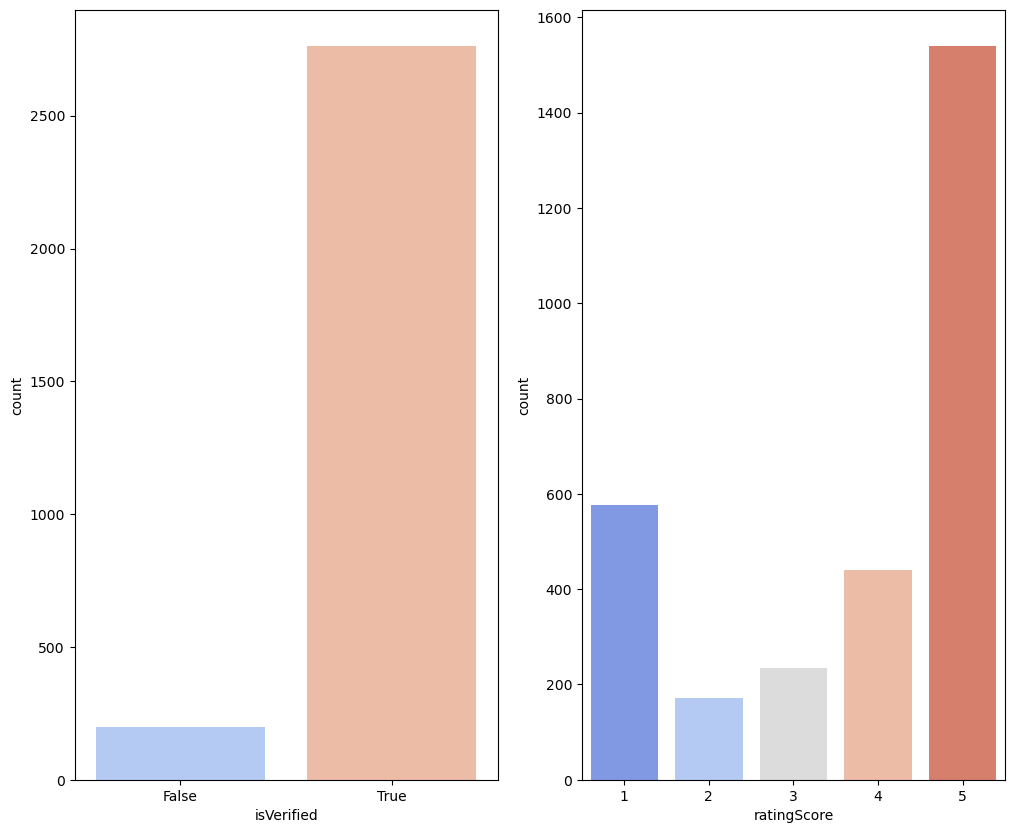

In [9]:
plt.figure(figsize=(12,10))
for i, a in enumerate(['isVerified','ratingScore']):
    plt.subplot(1,2,i+1)
    sns.countplot(data = df, x = a, palette = 'coolwarm')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   productAsin        2960 non-null   object        
 1   country            2960 non-null   object        
 2   date               2960 non-null   datetime64[ns]
 3   isVerified         2960 non-null   bool          
 4   ratingScore        2960 non-null   int64         
 5   reviewTitle        2960 non-null   object        
 6   reviewDescription  2960 non-null   object        
 7   reviewUrl          2960 non-null   object        
 8   reviewedIn         2960 non-null   object        
 9   variant            2960 non-null   object        
 10  variantAsin        2960 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(8)
memory usage: 257.3+ KB


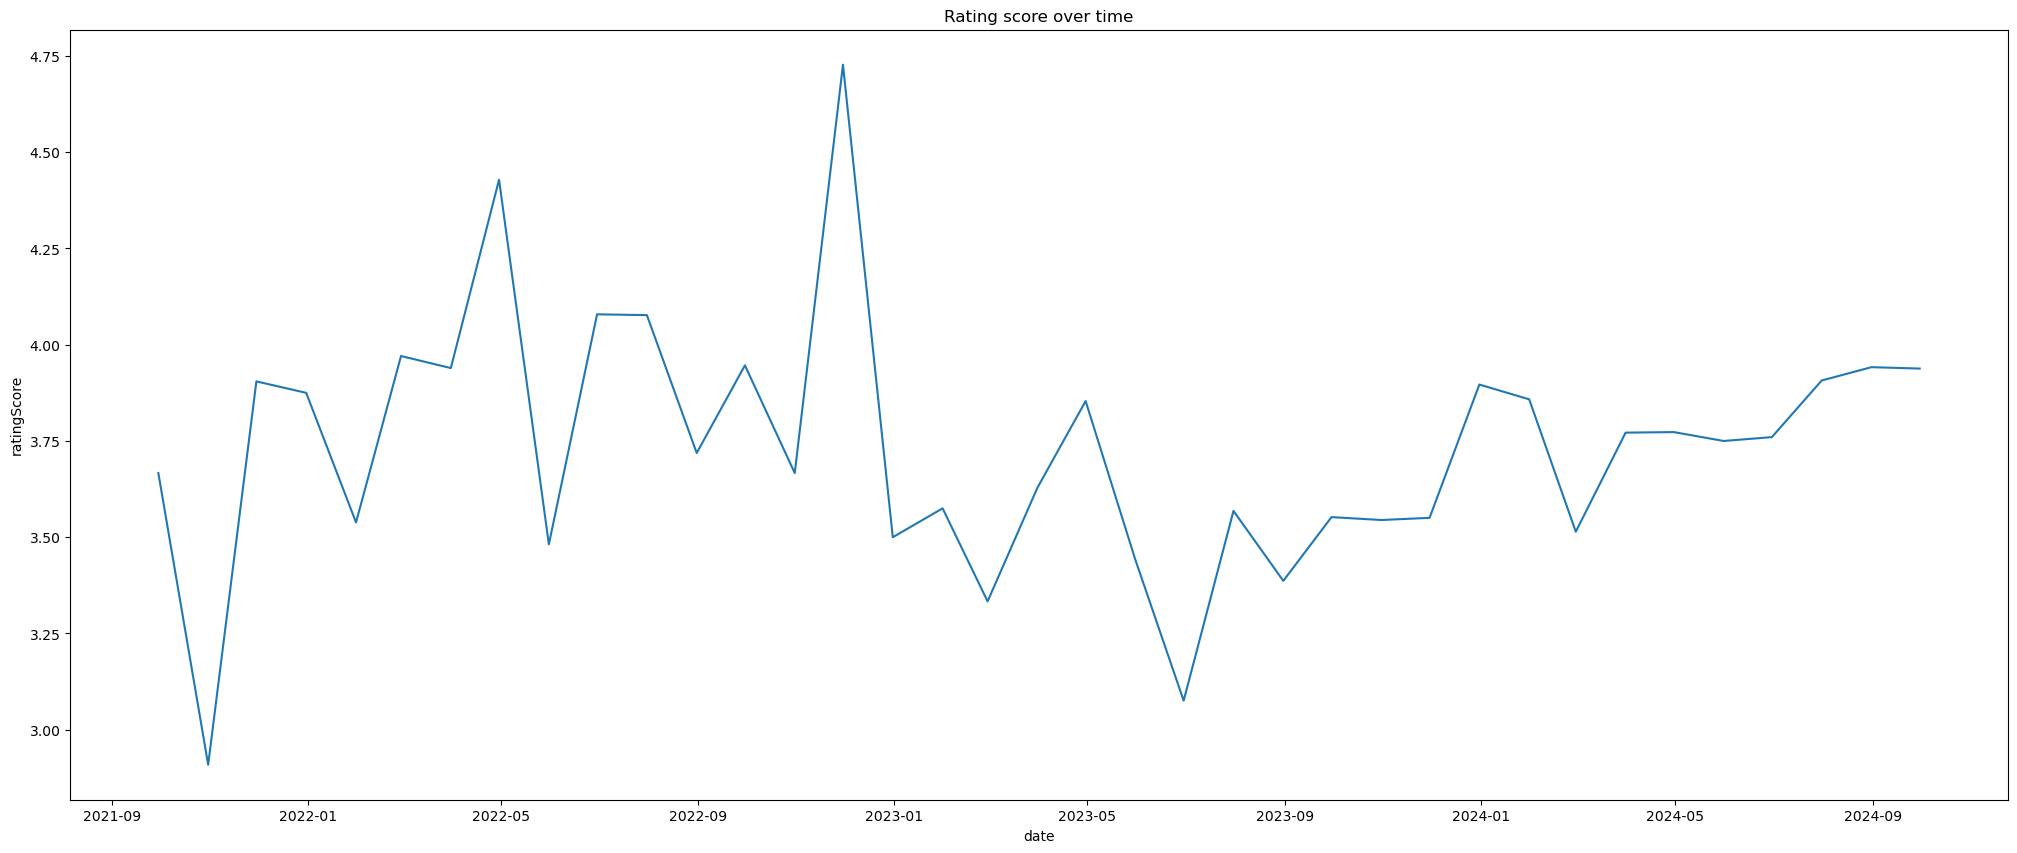

In [11]:
rat_time = df[['date','ratingScore']].set_index('date').resample('M').mean().reset_index()
plt.figure(figsize=(25,10))
sns.lineplot(data = rat_time, x = 'date', y = 'ratingScore')
plt.title("Rating score over time");

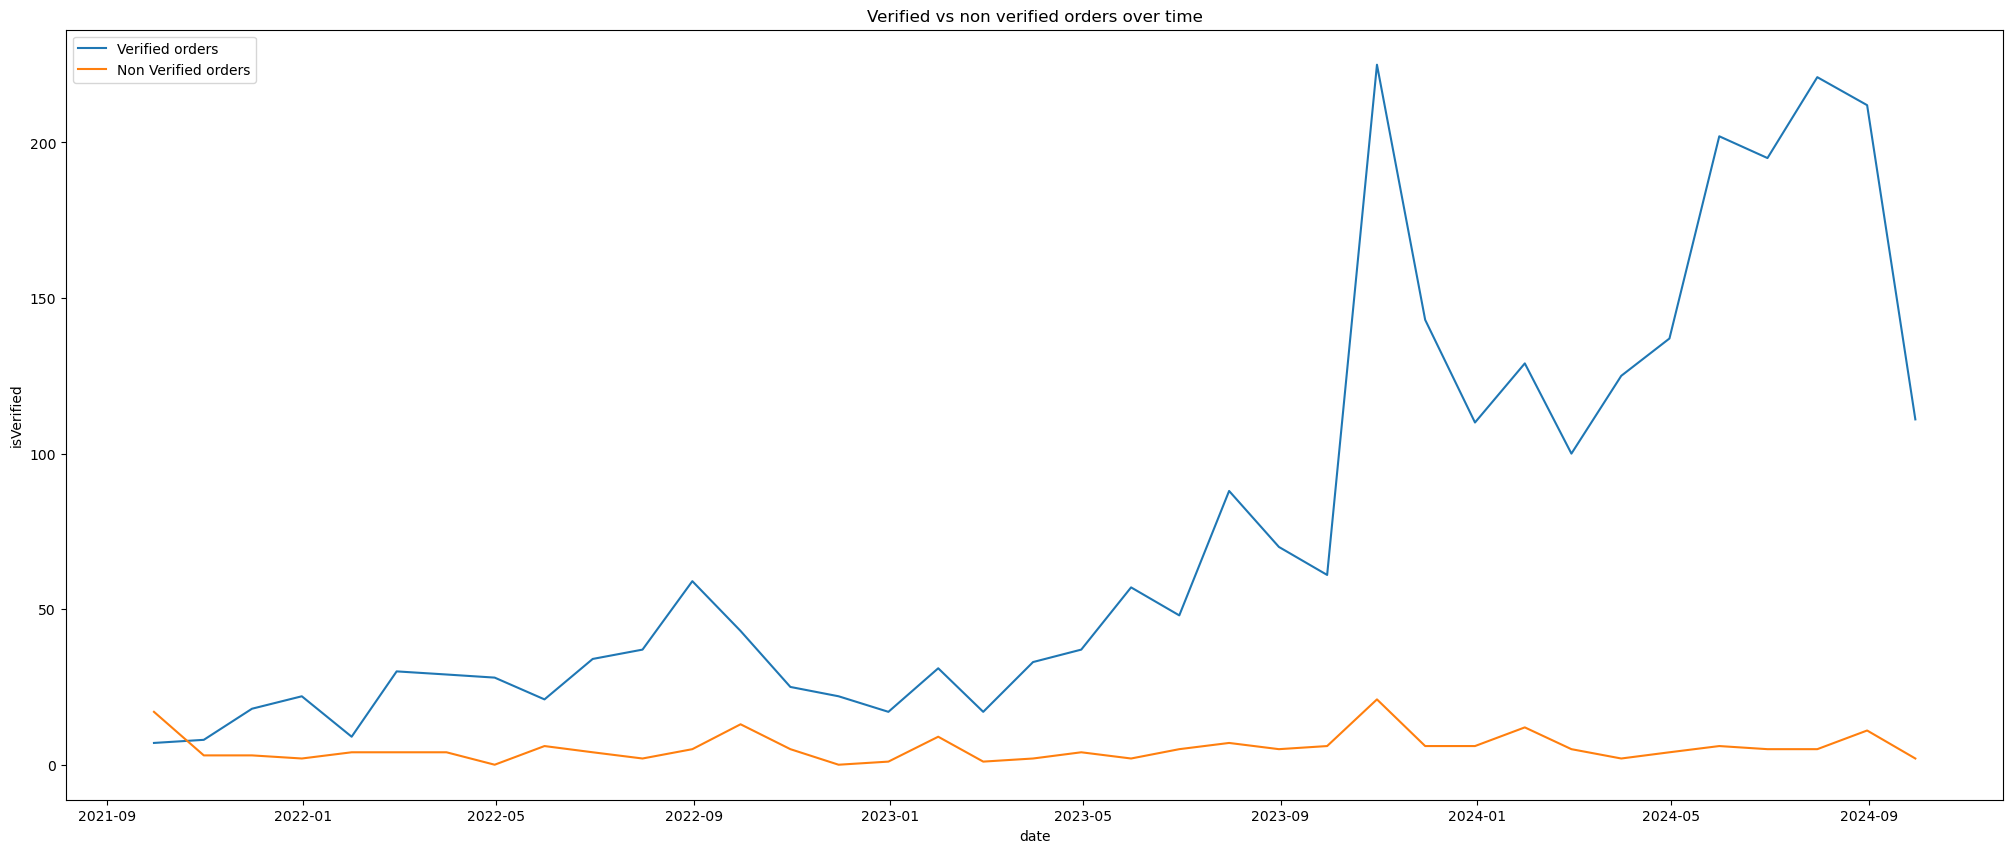

In [12]:
ver_dat = df[df['isVerified']==True][['date','isVerified']].set_index('date').resample('M').count().reset_index()
no_ver_dat = df[df['isVerified']==False][['date','isVerified']].set_index('date').resample('M').count().reset_index()
plt.figure(figsize=(25,10))
sns.lineplot(data = ver_dat, x = 'date', y = 'isVerified', label = 'Verified orders')
sns.lineplot(data = no_ver_dat, x = 'date', y = 'isVerified', label = 'Non Verified orders')
plt.title("Verified vs non verified orders over time")
plt.legend();

In [13]:
# Preprocessing
df['review'] = ['Positive' if x>3 else 'Negative' for x in df['ratingScore']]
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,review
0,B09G9BL5CP,India,2024-08-11,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Positive
1,B09G9BL5CP,India,2024-08-16,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Positive
2,B09G9BL5CP,India,2024-05-14,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Positive
3,B09G9BL5CP,India,2024-06-24,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Positive
4,B09G9BL5CP,India,2024-05-18,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,2023-10-11,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Negative
3058,B09G9D8KRQ,India,2022-10-14,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Negative
3059,B09G9D8KRQ,India,2022-02-24,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Negative
3060,B09G9D8KRQ,India,2023-10-16,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Negative


In [14]:
data = df[['reviewDescription','review']]
data

,reviewDescription,review
0,"Every thing is good about iPhones, there's not...",Positive
1,"It look so fabulous, I am android user switche...",Positive
2,I tried to flip camera while recording but no ...,Positive
3,100% genuine,Positive
4,Happy to get the iPhone 13 in Amazon offer,Positive
...,...,...
3057,Useless phon never buy this heat n useless cam...,Negative
3058,iam not happy with this product why because ch...,Negative
3059,Good phone,Negative
3060,While charging mobile it's getting so hot even...,Negative


In [15]:
# let's see word in positivea and negatif
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopword = set(stopwords.words('english'))
def word_sentiment(texts):
    words = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        filtered_tokens = [word for word in tokens if word.isalpha()  and word not in stopword]
        words.extend(filtered_tokens)
    return " ".join(words)
positive_reviews = data.query("review == 'Positive'")['reviewDescription']
negative_reviews = data.query("review == 'Negative'")['reviewDescription']
positive_text = word_sentiment(positive_reviews)
negative_text = word_sentiment(negative_reviews)

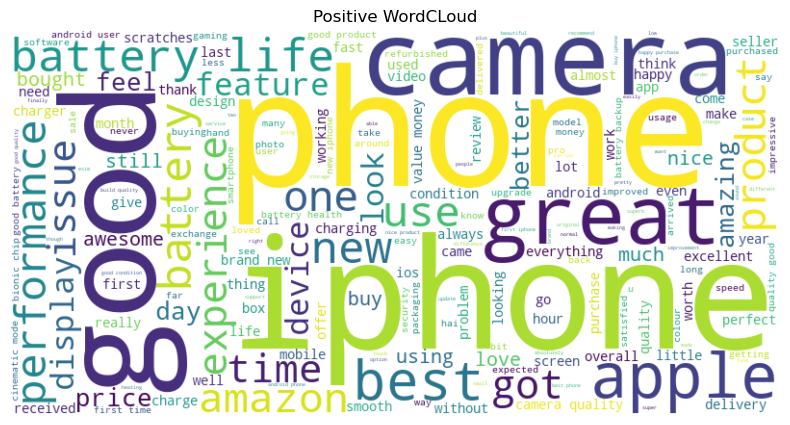

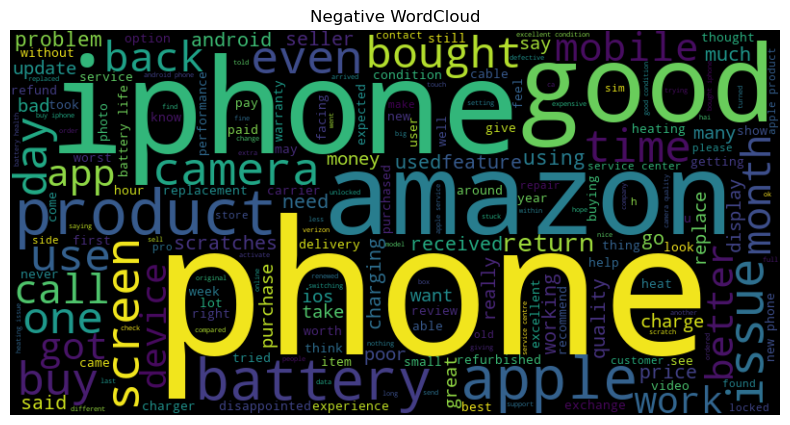

In [16]:
from wordcloud import WordCloud
wordcloud_pos = WordCloud(width=800, height =400, background_color = 'white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height =400, background_color = 'black').generate(negative_text)
sentiment = [wordcloud_pos,wordcloud_neg]
sentiments = ['Positive WordCLoud', 'Negative WordCloud']
for i,j in zip (sentiment,sentiments):
    plt.figure(figsize=(12,5))
    plt.imshow(i, interpolation = 'bilinear')
    plt.title(j)
    plt.axis('off')
    plt.show()

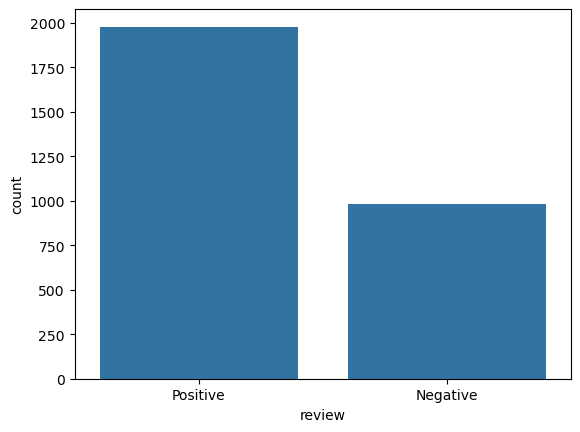

In [17]:
sns.countplot(data = data, x = 'review');

In [18]:
# Preprocessing text
import re
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
def lower_text(text):
    return text.lower()
def remove_special_character(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text
tokenize = ToktokTokenizer()
stopword = stopwords.words('english')
def remove_stopword(text, is_lower_case = False):
    tokens = tokenize.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
st = LancasterStemmer()
def stem(text):
    text = ' '.join([st.stem(word) for word in text.split()])
    return text
def processing_text(text):
    text = lower_text(text)
    text = remove_special_character(text)
    text = remove_stopword(text)
    text = stem(text)
    return text

In [19]:
data['reviewDescription'] = data['reviewDescription'].apply(processing_text)
data

,reviewDescription,review
0,every thing good iphon ther noth comp spee io ...,Positive
1,look fab android us switch appl perform wis ip...,Positive
2,tri flip camer record facil ad paus first flip...,Positive
3,100 genuin,Positive
4,happy get iphon 13 amazon off,Positive
...,...,...
3057,useless phon nev buy heat n useless camer pls ...,Negative
3058,iam happy produc charg provid appl extr burd c...,Negative
3059,good phon,Negative
3060,charg mobl get hot ev us mobl get much heat,Negative


In [20]:
# convert label into number
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
vectorizer = TfidfVectorizer()
le = LabelEncoder()
x = vectorizer.fit_transform(df['reviewDescription'])
y = le.fit_transform(df['review'])
print(x.shape)
print(y.shape)

(2960, 6320)
(2960,)


In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
x_train,y_train = smote.fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(3192, 6320)
(3192,)


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
test_model = [LogisticRegression(random_state =42),
              DecisionTreeClassifier(random_state =42),
              RandomForestClassifier(random_state =42), 
              ExtraTreesClassifier(random_state =42), 
              GradientBoostingClassifier(random_state =42), 
              AdaBoostClassifier(random_state =42),
              XGBClassifier(random_state=42)]
model = ['Logistic Regression',
         'Decision Tree Classifier',
         'Random Forest Classifier',
         'ExtraTreesClassifier',
         'GradientBoostingClassifier',
         'AdaBoostClassifier',
         'XGB']
result = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1'])
for i, x in enumerate(test_model):
    train_model = x.fit(x_train,y_train)
    test_model = x.predict(x_test)
    accuracy_scores = accuracy_score(y_test,test_model)
    precision_scores = precision_score(y_test,test_model, average = 'macro')
    recall_scores = recall_score(y_test,test_model,average = 'macro')
    f1_scores = f1_score(y_test,test_model,average = 'macro')
    #append to dataframe
    results = pd.DataFrame({'Model':[model[i]],
                           'Accuracy':[accuracy_scores],
                           'Precision':[precision_scores],
                           'Recall':[recall_scores],
                           'F1':[f1_scores]})
    result = pd.concat([result,results],ignore_index = True)
result


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.858108,0.843432,0.866428,0.850446
1,Decision Tree Classifier,0.819257,0.805312,0.792928,0.798257
2,Random Forest Classifier,0.858108,0.847239,0.839257,0.842935
3,ExtraTreesClassifier,0.878378,0.869247,0.862531,0.865683
4,GradientBoostingClassifier,0.815878,0.804436,0.783796,0.791887
5,AdaBoostClassifier,0.809122,0.792904,0.784008,0.787965
6,XGB,0.849662,0.840000,0.826208,0.832195


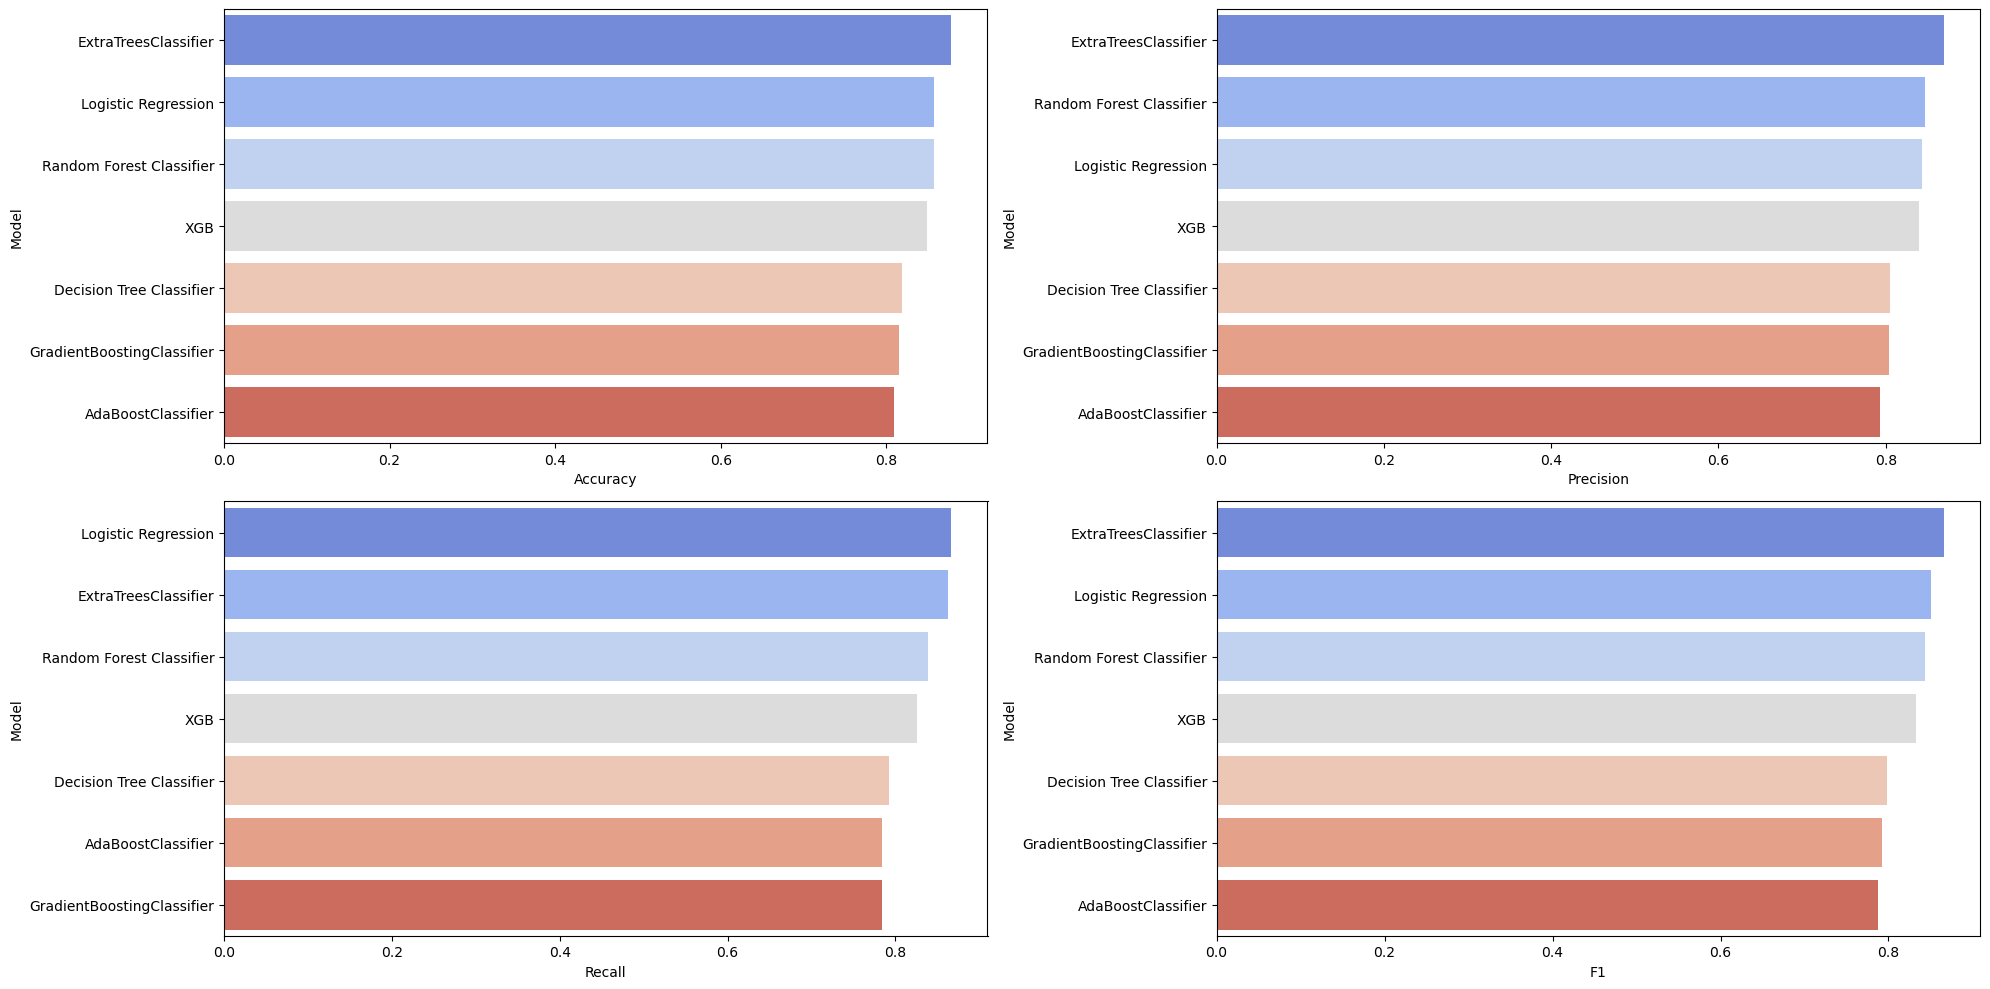

In [23]:
plt.figure(figsize=(20,10))
for i, a in enumerate(['Accuracy','Precision','Recall','F1']):
    plt.subplot(2,2,i+1)
    sns.barplot(data = result.sort_values(by=a, ascending = False), x= a, y = 'Model', palette= 'coolwarm')
plt.tight_layout()
plt.show()

In [24]:
# Since the data is balance now, we can use precision so we gonna use XGB for hyperparamater
from sklearn.model_selection import RandomizedSearchCV
model = ExtraTreesClassifier(random_state=42)
param_dist = {'n_estimators': [50,100,150],
              'min_samples_leaf':np.arange(1,10)}
random = RandomizedSearchCV(estimator = model,
                       param_distributions = param_dist,
                       n_iter = 50,
                       cv=2,
                       random_state=42,
                       verbose=2)
random.fit(x_train,y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   1.7s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   2.4s
[CV] END ...............min_samples_leaf=1, n_estimators=100; total time=   3.6s
[CV] END ...............min_samples_leaf=1, n_estimators=100; total time=   4.8s
[CV] END ...............min_samples_leaf=1, n_estimators=150; total time=   5.5s
[CV] END ...............min_samples_leaf=1, n_estimators=150; total time=   6.9s
[CV] END ................min_samples_leaf=2, n_estimators=50; total time=   1.2s
[CV] END ................min_samples_leaf=2, n_estimators=50; total time=   1.0s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=   1.9s
[CV] END ...............min_samples_leaf=2, n_estimators=100; total time=   2.4s
[CV] END ...............min_samples_leaf=2, n_estimators=150; total time=   2.5s
[CV] END ...............min_samples_leaf=2, n_es

RandomizedSearchCV(cv=2, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=2)

In [25]:
best_param= random.best_params_
print("Best Parameters:", best_param)
best_model= random.best_estimator_
print("Best model:", best_model)

Best Parameters: {'n_estimators': 150, 'min_samples_leaf': 1}
Best model: ExtraTreesClassifier(n_estimators=150, random_state=42)


In [26]:
best_model.fit(x_train,y_train)

ExtraTreesClassifier(n_estimators=150, random_state=42)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       209
           1       0.90      0.92      0.91       383

    accuracy                           0.88       592
   macro avg       0.87      0.87      0.87       592
weighted avg       0.88      0.88      0.88       592



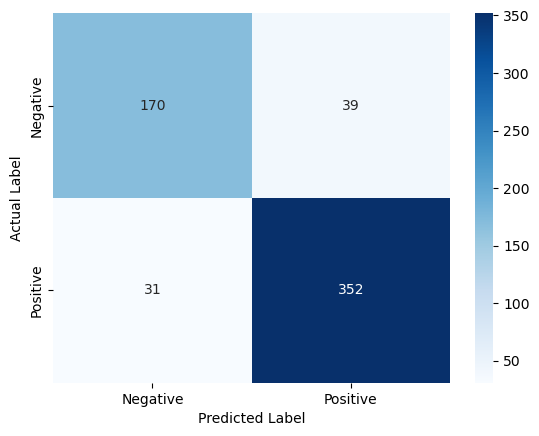

In [28]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,best_model.predict(x_test))), annot = True, fmt = '.0f', cmap = 'Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');